
---


# **Applying Machine Learning to Waste Management (2020)**




**Introduction**

As of now, approximately 6,000 million metric tons of waste have been produced and out of that, only 1,000 million metric tons have been recycled.

Oftentimes, objects that are recyclable get contaminated and/or mistaken as trash so they end up in the landfill rather than being recycled.

The goal of this project is to use machine learning algorithms to predict whether an item is recycling or trash, using a dataset on plastic and recycling items from Towards Data Science.

Source: Roland Geyer et al, “Production, use, and fate of all plastics ever made”, Science Advances, July 19, 2017, https://advances.sciencemag.org/content/advances/suppl/2017/07/17/3.7.e1700782.DC1/1700782_SM.pdf

First, the image data must be loaded in from Google Drive by using a path connected to the directory. The metal data is loaded in first, and a simple linear regression model is used to predict whether or not the item is recyclable. Since all the items are labeled as 'recyclable', the predictions are 100 percent accurate.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #getting content from drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image as PImage

path = 'drive/My Drive/dataset-resized.tar' #creating path to file directory in drive
files=os.listdir(os.path.join(os.getcwd(),path)) #listing each file
files

['cardboard', 'glass', 'trash', 'metal', 'paper', 'plastic', 'New Images']

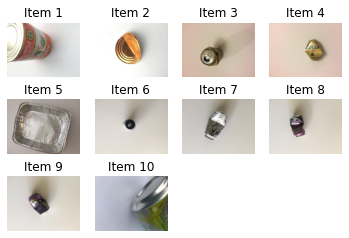

In [ ]:
path2 = 'drive/My Drive/dataset-resized.tar/metal/metal1.jpg' #path to specific image file
from keras_preprocessing import image
images=image.load_img(path2)
metal=plt.imread(path2)
#plt.imshow(images) #displays metal1 image

n=10
paths=[] #creates list of paths
from keras_preprocessing import image
for i in range(n): #importing and loading first ten images from path
  path2='drive/My Drive/dataset-resized.tar/metal/metal{}.jpg'.format(i+1)
  paths.append(path2)
  plt.subplot(3,4,i+1, ) #displaying images
  images=image.load_img(path2)
  plt.title("Item {}".format(i+1))
  plt.axis('off')
  metal_img=plt.imshow(images)

images_=[]
metals=[] #list of metal images
kinds=[] #list of image kind (is it recyclable)
from keras_preprocessing import image
for j in paths:
  #plt.figure(j)
  images=image.load_img(j)
  images_.append(images)
  metal_img=plt.imshow(images)
  metals.append(metal_img)
  kind='Yes' #is it recyclable
  kinds.append(kind)

In [ ]:
arrays=[] #list of arrays for each image
from keras_preprocessing import image
for j in paths[:10]:
  m=plt.imread(j) #converting pixels into x-y coordinates
  a=np.array(m) #making an array of coordinates
  a_new=a.flatten() #making array one dimensional
  arrays.append(a_new) #adding each array to list
arrays #displaying list of flattened arrays

[array([251, 253, 252, ..., 217, 221, 220], dtype=uint8),
 array([255, 255, 253, ..., 212, 213, 207], dtype=uint8),
 array([210, 174, 160, ..., 198, 168, 157], dtype=uint8),
 array([243, 204, 197, ..., 216, 184, 171], dtype=uint8),
 array([182, 171, 167, ..., 142, 132, 122], dtype=uint8),
 array([201, 192, 183, ..., 227, 220, 204], dtype=uint8),
 array([193, 188, 184, ..., 209, 205, 193], dtype=uint8),
 array([205, 200, 194, ..., 229, 221, 202], dtype=uint8),
 array([209, 204, 200, ..., 229, 222, 206], dtype=uint8),
 array([205, 208, 223, ...,  74, 102,  41], dtype=uint8)]

In [ ]:
metal_data=pd.DataFrame(data=metals) #storing metal image data
kind_data=pd.DataFrame(data=kinds) #storing kind data
data=pd.concat([metal_data, kind_data],axis=1) #merging kind and metal data together
data.columns=["Object Image","Recyclable?"]
data #displaying data

,Object Image,Recyclable?
0,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
1,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
2,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
3,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
4,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
5,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
6,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
7,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
8,"AxesImage(141.339,40.683;72.7826x54.587)",Yes
9,"AxesImage(141.339,40.683;72.7826x54.587)",Yes


In [ ]:
from sklearn import preprocessing
object_label=preprocessing.LabelEncoder()
x=arrays
y=kind_data.iloc[:10]
y_new=y.apply(object_label.fit_transform) #converting character label to integer label
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y_new, test_size=0.5,random_state=0) #splitting data into training and testing categories
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
m_predictions=regressor.predict(x_test) #predicts whether object is recyclable or not
p_data=pd.DataFrame(data=m_predictions, columns=["Metal Recycling Predictions"]) #0 is recyclable
p_data

,Metal Recycling Predictions
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Object Image,Type
0,"AxesImage(141.339,36;72.7826x63.9529)",Metal
1,"AxesImage(141.339,36;72.7826x63.9529)",Metal
2,"AxesImage(141.339,36;72.7826x63.9529)",Metal
3,"AxesImage(141.339,36;72.7826x63.9529)",Metal
4,"AxesImage(141.339,36;72.7826x63.9529)",Metal
5,"AxesImage(141.339,36;72.7826x63.9529)",Metal
6,"AxesImage(141.339,36;72.7826x63.9529)",Metal
7,"AxesImage(141.339,36;72.7826x63.9529)",Metal
8,"AxesImage(141.339,36;72.7826x63.9529)",Metal
9,"AxesImage(141.339,36;72.7826x63.9529)",Metal


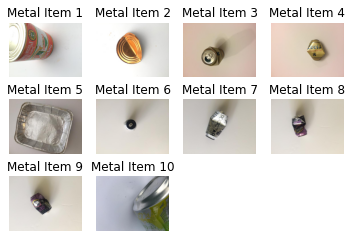

In [ ]:
import os
from PIL import Image as PImage

path_m = 'drive/My Drive/dataset-resized.tar/metal'
files_m=os.listdir(os.path.join(os.getcwd(),path))
path2_m = 'drive/My Drive/dataset-resized.tar/metal/metal1.jpg'
from keras_preprocessing import image
#images=image.load_img(path2)
#metal=plt.imread(path2)
#plt.imshow(images)

n=10
paths_m=[]
from keras_preprocessing import image
for i in range(n):
  path2='drive/My Drive/dataset-resized.tar/metal/metal{}.jpg'.format(i+1)
  paths_m.append(path2)
  plt.subplot(3,4,i+1)
  plt.title("Metal Item {}".format(i+1))
  plt.axis("off")
  image_m=image.load_img(path2)
  metal_img=plt.imshow(image_m)

images_m=[]
metals=[]
kind_m=[]
from keras_preprocessing import image
for j in paths_m:
  #plt.figure(j)
  image_m=image.load_img(j)
  images_m.append(image_m)
  metal_img=plt.imshow(image_m)
  metals.append(metal_img)
  kind='Metal'
  kind_m.append(kind)

arrays_m=[]
from keras_preprocessing import image
for j in paths_m[:10]:
  m=plt.imread(j)
  a_m=np.array(m)
  a_mnew=a_m.flatten()
  arrays_m.append(a_mnew)
arrays_m

metal_data=pd.DataFrame(data=metals)
kind_mdata=pd.DataFrame(data=kind_m)
data_m=pd.concat([metal_data, kind_mdata],axis=1)
data_m.columns=["Object Image","Type"]
data_m





,Object Image,Type
0,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
1,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
2,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
3,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
4,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
5,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
6,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
7,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
8,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard
9,"AxesImage(141.339,36;72.7826x63.9529)",Cardboard


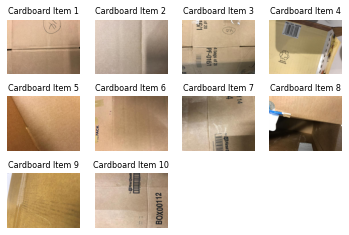

In [ ]:
import os
from PIL import Image as PImage
#doing the same as above, but for cardboard
path_c= 'drive/My Drive/dataset-resized.tar/cardboard'
files_c=os.listdir(os.path.join(os.getcwd(),path))
path2_c = 'drive/My Drive/dataset-resized.tar/cardboard/cardboard1.jpg'
from keras_preprocessing import image
#images=image.load_img(path2)
#metal=plt.imread(path2)
#plt.imshow(images)

n=10
paths_c=[]
from keras_preprocessing import image
for i in range(n):
  path2='drive/My Drive/dataset-resized.tar/cardboard/cardboard{}.jpg'.format(i+1)
  paths_c.append(path2)
  plt.subplot(3,4,i+1)
  image_m=image.load_img(path2)
  cardboard_img=plt.imshow(image_m)
  plt.title("Cardboard Item {}".format(i+1), fontsize=8)
  plt.axis("off")

images_c=[]
cardboard=[]
kind_c=[]
from keras_preprocessing import image
for j in paths_c:
  #plt.figure(j)
  image_c=image.load_img(j)
  images_c.append(image_c)
  cardboard_img=plt.imshow(image_c)
  cardboard.append(cardboard_img)
  kind='Cardboard'
  kind_c.append(kind)

arrays_c=[]
from keras_preprocessing import image
for j in paths_c[:10]:
  c=plt.imread(j)
  a_c=np.array(c)
  a_cnew=a_c.flatten()
  arrays_c.append(a_cnew)
arrays_c

cboard_data=pd.DataFrame(data=cardboard)
kind_cdata=pd.DataFrame(data=kind_c)
data_c=pd.concat([cboard_data, kind_cdata],axis=1)
data_c.columns=["Object Image","Type"]
data_c






,Object Image,Type
0,"AxesImage(141.339,36;72.7826x63.9529)",Glass
1,"AxesImage(141.339,36;72.7826x63.9529)",Glass
2,"AxesImage(141.339,36;72.7826x63.9529)",Glass
3,"AxesImage(141.339,36;72.7826x63.9529)",Glass
4,"AxesImage(141.339,36;72.7826x63.9529)",Glass
5,"AxesImage(141.339,36;72.7826x63.9529)",Glass
6,"AxesImage(141.339,36;72.7826x63.9529)",Glass
7,"AxesImage(141.339,36;72.7826x63.9529)",Glass
8,"AxesImage(141.339,36;72.7826x63.9529)",Glass
9,"AxesImage(141.339,36;72.7826x63.9529)",Glass


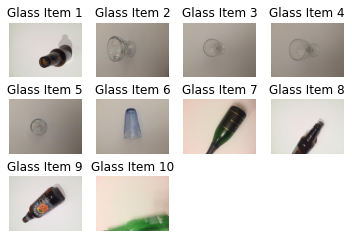

In [ ]:
import os
from PIL import Image as PImage
#same as above, but for glass
path_g = 'drive/My Drive/dataset-resized.tar/glass'
files_g=os.listdir(os.path.join(os.getcwd(),path))
path2_g = 'drive/My Drive/dataset-resized.tar/glass/glass1.jpg'
from keras_preprocessing import image
#images=image.load_img(path2)
#metal=plt.imread(path2)
#plt.imshow(images)

n=10
paths_g=[]
from keras_preprocessing import image
for i in range(n):
  path2='drive/My Drive/dataset-resized.tar/glass/glass{}.jpg'.format(i+1)
  paths_g.append(path2)
  plt.subplot(3,4,i+1)
  image_g=image.load_img(path2)
  glass_img=plt.imshow(image_g)
  plt.title("Glass Item {}".format(i+1))
  plt.axis("off")

images_g=[]
glass=[]
kind_g=[]
from keras_preprocessing import image
for j in paths_g:
  #plt.figure(j)
  image_g=image.load_img(j)
  images_g.append(image_g)
  glass_img=plt.imshow(image_g)
  glass.append(glass_img)
  kind='Glass'
  kind_g.append(kind)

arrays_g=[]
from keras_preprocessing import image
for j in paths_g[:10]:
  g=plt.imread(j)
  a_g=np.array(g)
  a_gnew=a_g.flatten()
  arrays_g.append(a_gnew)
arrays_g

glass_data=pd.DataFrame(data=glass)
kind_gdata=pd.DataFrame(data=kind_g)
data_g=pd.concat([glass_data, kind_gdata],axis=1)
data_g.columns=["Object Image","Type"]
data_g


,Object Image,Type
0,"AxesImage(141.339,36;72.7826x63.9529)",Paper
1,"AxesImage(141.339,36;72.7826x63.9529)",Paper
2,"AxesImage(141.339,36;72.7826x63.9529)",Paper
3,"AxesImage(141.339,36;72.7826x63.9529)",Paper
4,"AxesImage(141.339,36;72.7826x63.9529)",Paper
5,"AxesImage(141.339,36;72.7826x63.9529)",Paper
6,"AxesImage(141.339,36;72.7826x63.9529)",Paper
7,"AxesImage(141.339,36;72.7826x63.9529)",Paper
8,"AxesImage(141.339,36;72.7826x63.9529)",Paper
9,"AxesImage(141.339,36;72.7826x63.9529)",Paper


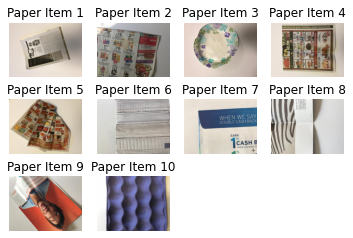

In [ ]:
import os
from PIL import Image as PImage
#same as above, but for paper
path_p= 'drive/My Drive/dataset-resized.tar/paper'
files_p=os.listdir(os.path.join(os.getcwd(),path))
path2_p = 'drive/My Drive/dataset-resized.tar/paper/paper1.jpg'
from keras_preprocessing import image
#images=image.load_img(path2)
#metal=plt.imread(path2)
#plt.imshow(images)

n=10
paths_p=[]
from keras_preprocessing import image
for i in range(n):
  path2='drive/My Drive/dataset-resized.tar/paper/paper{}.jpg'.format(i+1)
  paths_p.append(path2)
  plt.subplot(3,4,i+1)
  image_p=image.load_img(path2)
  paper_img=plt.imshow(image_p)
  plt.title("Paper Item {}".format(i+1))
  plt.axis("off")

images_p=[]
paper=[]
kind_p=[]
from keras_preprocessing import image
for j in paths_p:
  #plt.figure(j)
  image_p=image.load_img(j)
  images_p.append(image_p)
  paper_img=plt.imshow(image_p)
  paper.append(paper_img)
  kind='Paper'
  kind_p.append(kind)

arrays_p=[]
from keras_preprocessing import image
for j in paths_p[:10]:
  p=plt.imread(j)
  a_p=np.array(p)
  a_pnew=a_p.flatten()
  arrays_p.append(a_pnew)
arrays_p

paper_data=pd.DataFrame(data=paper)
kind_pdata=pd.DataFrame(data=kind_p)
data_p=pd.concat([paper_data, kind_pdata],axis=1)
data_p.columns=["Object Image","Type"]
data_p






,Object Image,Type
0,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
1,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
2,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
3,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
4,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
5,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
6,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
7,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
8,"AxesImage(141.339,36;72.7826x63.9529)",Plastic
9,"AxesImage(141.339,36;72.7826x63.9529)",Plastic


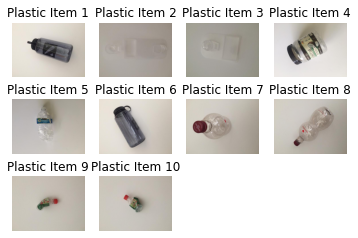

In [ ]:
import os
from PIL import Image as PImage
#same as above, but for plastic
path_pl= 'drive/My Drive/dataset-resized.tar/plastic'
files_pl=os.listdir(os.path.join(os.getcwd(),path))
path2_pl = 'drive/My Drive/dataset-resized.tar/plastic/plastic1.jpg'
from keras_preprocessing import image
#images=image.load_img(path2)
#metal=plt.imread(path2)
#plt.imshow(images)

n=10
paths_pl=[]
from keras_preprocessing import image
for i in range(n):
  path2='drive/My Drive/dataset-resized.tar/plastic/plastic{}.jpg'.format(i+1)
  paths_pl.append(path2)
  plt.subplot(3,4,i+1)
  image_pl=image.load_img(path2)
  plastic_img=plt.imshow(image_pl)
  plt.title("Plastic Item {}".format(i+1))
  plt.axis("off")

images_pl=[]
plastic=[]
kind_pl=[]
from keras_preprocessing import image
for j in paths_pl:
  #plt.figure(j)
  image_pl=image.load_img(j)
  images_pl.append(image_pl)
  plastic_img=plt.imshow(image_pl)
  plastic.append(plastic_img)
  kind='Plastic'
  kind_pl.append(kind)

arrays_pl=[]
from keras_preprocessing import image
for j in paths_pl[:10]:
  pl=plt.imread(j)
  a_pl=np.array(pl)
  a_plnew=a_pl.flatten()
  arrays_pl.append(a_plnew)
arrays_pl

plastic_data=pd.DataFrame(data=plastic)
kind_pldata=pd.DataFrame(data=kind_pl)
data_pl=pd.concat([plastic_data, kind_pldata],axis=1)
data_pl.columns=["Object Image","Type"]
data_pl






In [ ]:
data_comb=pd.concat([data_m,data_c,data_g,data_p,data_pl], axis=0) #combining image data with type data so can see which image corresponds with which type
data_comb

,Object Image,Type
0,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
1,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
2,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
3,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
4,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
5,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
6,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
7,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
8,"AxesImage(141.339,40.683;72.7826x54.587)",Metal
9,"AxesImage(141.339,40.683;72.7826x54.587)",Metal


In [ ]:
data_comb["Type"].unique() #listing unique categories of column two data

array(['Metal', 'Cardboard', 'Glass', 'Paper', 'Plastic'], dtype=object)

In [ ]:
print(np.shape(arrays_m)) #shape of metal array

(10, 589824)


In [ ]:
arrays_tot=np.array((arrays_m, arrays_c, arrays_g, arrays_p, arrays_pl)) #creating new array with five rows for each category and ten columns for every image in category. Each image has shape 589824.
arrays_new=np.transpose(arrays_tot, axes=[0,1,2]).reshape(50,-1) #reshaping array so will have be same as second array for object type
kind_tot=np.array([kind_m, kind_c, kind_g, kind_p, kind_pl]) #creating array for each object's type. Has shape of 50.
kind_new=kind_tot.flatten() #making array one dimensional
kind_tdata=pd.DataFrame(data=kind_new, columns=["Object Type"]) #creating data table for object type so can label encode later
kind_tdata

,Object Type
0,Metal
1,Metal
2,Metal
3,Metal
4,Metal
5,Metal
6,Metal
7,Metal
8,Metal
9,Metal


In [ ]:
from sklearn import preprocessing
type_label=preprocessing.LabelEncoder()
x2=arrays_new
y2=kind_tdata
y2_new=y2.apply(type_label.fit_transform) #converting string labels into integer labels

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x2, y2_new, test_size=0.3) #creating train_test model
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
data_scaler=StandardScaler()
data_scaler.fit(x_train)
x_train=data_scaler.transform(x_train) #scaling x data so will lead to more accurate results
x_test=data_scaler.transform(x_test)

Before categorizing objects into recycling and landfill groups, the recycling group can be analyzed. It contains different types of materials that the objects can be labeled as. The following two neural networks take input image data (in the form of pixel coordinate arrays) and using the training data creates a model analyzing each pixel coordinate of the image and then uses it to make predictions on whether or not the object in the image is metal, cardboard, glass, paper, or plastic. The second neural network has a 40 macro average precision percentage, compared to the 27 percentage of the first neural network. This is because the second neural network has a larger hidden layer size, so the weights and biases of each input coordinate can be analyzed more precisely.

In [ ]:
from sklearn.neural_network import MLPClassifier

obj_neural=MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000) #setting up neural network. Increasing hidden layer size leads to more accurate results
obj_neural.fit(x_train, y_train.values.ravel()) #fitting neural network, including bias and weight vectors to training data

predictions=obj_neural.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions)) #compares predicted classes to actual classes --> showing which objects got classified the right way according to a matrix.
print(classification_report(y_test, predictions)) #analyzes the predictions

[[0 2 0 0 0]
 [0 1 0 0 3]
 [0 1 1 0 1]
 [0 1 0 0 3]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.20      0.25      0.22         4
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         4
           4       0.22      1.00      0.36         2

    accuracy                           0.27        15
   macro avg       0.28      0.32      0.22        15
weighted avg       0.28      0.27      0.21        15



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier

obj_neural=MLPClassifier(hidden_layer_sizes=(40,40,40), max_iter=64000) #setting up neural network. Increasing hidden layer size leads to more accurate results
obj_neural.fit(x_train, y_train.values.ravel()) #fitting neural network, including bias and weight vectors to training data

predictions=obj_neural.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions)) #compares predicted classes to actual classes --> showing which objects got classified the right way according to a matrix.
print(classification_report(y_test, predictions)) #analyzes the predictions

[[1 0 0 0 1]
 [0 2 0 1 1]
 [0 1 2 0 0]
 [0 1 0 0 3]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         4
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         4
           4       0.29      1.00      0.44         2

    accuracy                           0.47        15
   macro avg       0.56      0.53      0.48        15
weighted avg       0.50      0.47      0.44        15



In [ ]:
data_predicted=pd.DataFrame(data=predictions, columns=["Predicted Type"]) #making a data table
data_p=data_predicted.apply(type_label.inverse_transform) #converting integer labels back into string labels
data_p

,Predicted Type
0,Glass
1,Paper
2,Metal
3,Cardboard
4,Glass
5,Plastic
6,Plastic
7,Plastic
8,Glass
9,Plastic


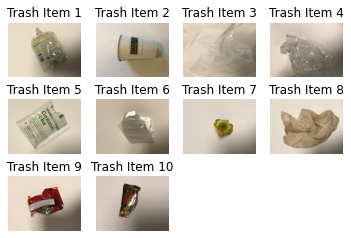

In [ ]:
import os
from PIL import Image as PImage
#loading path to import trash images
path = 'drive/My Drive/dataset-resized.tar/trash'
files=os.listdir(os.path.join(os.getcwd(),path))
path2 = 'drive/My Drive/dataset-resized.tar/trash/trash1.jpg'
from keras_preprocessing import image
#images=image.load_img(path2)
#metal=plt.imread(path2)
#plt.imshow(images)

n=10
paths_t=[]
from keras_preprocessing import image
for i in range(n):
  path2='drive/My Drive/dataset-resized.tar/trash/trash{}.jpg'.format(i+1)
  paths_t.append(path2)
  plt.subplot(3,4,i+1)
  image_t=image.load_img(path2)
  trash_img=plt.imshow(image_t)
  plt.title("Trash Item {}".format(i+1))
  plt.axis("off")

images_t=[]
trash=[]
kinds_t1=[]
kinds_t2=[]
from keras_preprocessing import image
for j in paths_t:
  #plt.figure(j)
  image_t=image.load_img(j)
  images_t.append(image_t)
  trash_img=plt.imshow(image_t)
  trash.append(trash_img)
  kind1='Not Recyclable'
  kind2='Trash'
  kinds_t1.append(kind1)
  kinds_t2.append(kind2)


In [ ]:
arrays_t=[]
from keras_preprocessing import image
for j in paths_t[:10]:
  t=plt.imread(j)
  a_t=np.array(t)
  a_tnew=a_t.flatten()
  arrays_t.append(a_tnew)
arrays_t

trash_data=pd.DataFrame(data=trash)
kind_tdata=pd.DataFrame(data=kinds_t2)
data_t=pd.concat([trash_data, kind_tdata],axis=1)
data_t.columns=["Object Image","Type"]
data_t


,Object Image,Type
0,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
1,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
2,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
3,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
4,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
5,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
6,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
7,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
8,"AxesImage(141.339,40.683;72.7826x54.587)",Trash
9,"AxesImage(141.339,40.683;72.7826x54.587)",Trash


In [ ]:
kinds_r=[]
for i in range (10):
  kind="Recyclable"
  kinds_r.append(kind)
kind_comp=np.array([kinds_r, kinds_t1])
kind_comp_new=kind_comp.flatten()
kcn=pd.DataFrame(data=kind_comp_new, columns=["Recycling"])
kcn["Recycling"].unique() #this time creating two unique categories: recycling and trash

array(['Recyclable', 'Not Recyclable'], dtype=object)

In [ ]:
#Selecting first two elements of each array (5 total) and
#combining with array containing ten trash items so will result in array with ten
#recycling items and ten trash items
array_r=np.array([arrays_m[:2],arrays_c[:2], arrays_g[:2], arrays_p[:2], arrays_pl[:2]])
array_r_new=np.transpose(array_r, axes=[0,1,2]).reshape(10,-1)
array_comp=np.transpose([array_r_new, arrays_t], axes=[0,1,2]).reshape(20,-1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
r_label=LabelEncoder()
a=array_comp
b=kcn
b_new=b.apply(r_label.fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test=train_test_split(a,b_new,test_size=0.4)

In [ ]:
from sklearn.preprocessing import StandardScaler
data_scaler2=StandardScaler()
data_scaler2.fit(a_train)
a_train=data_scaler2.transform(a_train) #scaling a data so will lead to more accurate results
a_test=data_scaler2.transform(a_test)

This neural network takes input image data (in the form of pixel coordinate arrays) and using the training data creates a model analyzing each pixel coordinate of the image and then uses it to make predictions on whether or not the object in the image is recyclable or belongs in the landfill.

In [ ]:
from sklearn.neural_network import MLPClassifier

comp_neural=MLPClassifier(hidden_layer_sizes=(40,40,40), max_iter=64000) #setting up neural network. Increasing hidden layer size leads to more accurate results
comp_neural.fit(a_train, b_train.values.ravel()) #fitting neural network, including bias and weight vectors to training data

pred_comp=comp_neural.predict(a_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(b_test, pred_comp)) #compares predicted classes to actual classes (recycling or not) --> showing which objects got classified the right way according to a matrix.
print(classification_report(b_test, pred_comp)) #analyzes the predictions

[[3 1]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



In [ ]:
data_pred=pd.DataFrame(data=pred_comp, columns=["Recycling Predictions"]) #making a data table
data_pr=data_pred.apply(r_label.inverse_transform) #converting integer labels back into string labels
data_pr

,Recycling Predictions
0,Recyclable
1,Recyclable
2,Not Recyclable
3,Recyclable
4,Recyclable
5,Not Recyclable
6,Not Recyclable
7,Recyclable


The neural network above was tested on a new image of a plastic bottle that was not a part of the data set. The bottle was classified as "recyclable", which it is!

,Recycling Predictions
0,Recyclable


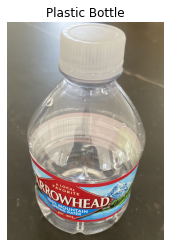

In [ ]:
new_path='drive/My Drive/dataset-resized.tar/New Images/IMG_0625.JPG'
from keras_preprocessing import image
new_img=image.load_img(new_path)
img_data=plt.imread(new_path)
img_array=np.array(img_data)
img=np.resize(img_array, new_shape=(384,512,3))
img_changed=np.transpose(img, axes=[0,1,2]).reshape(1,-1)
plt.figure()
plt.imshow(new_img)
plt.axis("off")
plt.title("Plastic Bottle")
bottle_pred=comp_neural.predict(img_changed)
bottle_pred
data_pred2=pd.DataFrame(data=bottle_pred, columns=["Recycling Predictions"]) #making a data table
data_pr2=data_pred2.apply(r_label.inverse_transform) #converting integer labels back into string labels
data_pr2


**Conclusion**

The neural network resulted in more accurate predictions when the hidden layer size was increased and when the algorithm categorized the data into two groups: recycling and trash. For the trash and recycling comparisons, the neural network had a 75 macro average precision percentage, compared to the 40 precision percentage resulting from the recycling sorting algorithm.

In the future, this project could be expanded to include compostable items as well as trash and recycling so that the algorithm can sort into three categories instead.